In [1]:
PATH_TO_GAPSE = "../";

In [2]:
include(PATH_TO_GAPSE * "src/GaPSE.jl");

In [3]:
using DelimitedFiles, Plots, Dierckx, SpecialFunctions
using Printf, LaTeXStrings

In [4]:
FILE_F_MAP = PATH_TO_GAPSE * "test/datatest/F_REFERENCE.txt"
FILE_PS = PATH_TO_GAPSE * "test/datatest/file_pk.txt"
FILE_BACKGROUND =  PATH_TO_GAPSE * "test/datatest/WideA_ZA_background.dat"

z_min = 0.05
z_max = 0.20
θ_max = π / 2.0
params = GaPSE.CosmoParams(z_min, z_max, θ_max;
  k_min = 1e-8, k_max = 10.0,
  Ω_b = 0.0489, Ω_cdm = 0.251020, h_0 = 0.70,
    N = 1024, fit_min = 0.05, fit_max= 0.5, con=true)

cosmo = GaPSE.Cosmology(params, FILE_BACKGROUND, FILE_PS, FILE_F_MAP)

GaPSE.parameters_used(stdout, cosmo)

# The following parameters were used for this computation: 
# CLASS Power Spectrum input file : "../test/datatest/file_pk.txt"
# F window function input file : "../test/datatest/F_REFERENCE.txt"
# CLASS Background input file: "../test/datatest/WideA_ZA_background.dat"
# 	 z_min = 0.05 	 z_max = 0.2
# 	 k_min = 1.0e-8 	 k_max = 10.0
# 	 h_0 = 0.7 	 Ω_b = 0.0489 	 Ω_cdm = 0.25102 	 Ω_M0 = 0.29992
# 	 comoving s_min = 148.1920001465757 Mpc/h_0
# 	 comoving s_max = 571.7022420258767 Mpc/h_0
# 	 comoving s_eff = 435.3747095690664 Mpc/h_0
# 	 comoving z_eff = 0.15045636096023224 
# 	 Volume of the survey V_survey = 3.845366167995967e8
# 	 σ_0 = 15.593462966741178
# 	 σ_1 = 15.074895881392285
# 	 σ_2 = 100.85852368830226
# 	 σ_3 = 3735.1226181519773
# 


In [5]:
IMPLEMENTED_GR_EFFECTS = [
     "auto_doppler", "auto_lensing",
     "auto_localgp", "auto_integratedgp",

     "lensing_doppler", "doppler_lensing",
     "doppler_localgp", "localgp_doppler",
     "doppler_integratedgp",  "integratedgp_doppler",
     "lensing_localgp", "localgp_lensing",
     "lensing_integratedgp",  "integratedgp_lensing",
     "localgp_integratedgp", "integratedgp_localgp",
];

ξs_names = [
    L"$\xi^{v_{\parallel} \, v_{\parallel}}$", 
    L"$\xi^{\kappa \, \kappa}$", 
    L"$\xi^{\phi \, \phi}$", 
    L"$\xi^{\int\phi \, \int\phi}$", 
    
    L"$\xi^{\kappa \, v_{\parallel}}$",
    L"$\xi^{v_{\parallel} \, \kappa}$",
    
    L"$\xi^{v_{\parallel} \, \phi}$",
    L"$\xi^{\phi \, v_{\parallel}}$",
    
    L"$\xi^{v_{\parallel} \, \int\phi}$",
    L"$\xi^{\int\phi \, v_{\parallel}}$",
    
    L"$\xi^{\kappa \, \phi}$",
    L"$\xi^{\phi \, \kappa}$",
    
    L"$\xi^{\kappa \, \int\phi}$",
    L"$\xi^{\int\phi \, \kappa}$",
    
    L"$\xi^{\phi \, \int\phi}$",
    L"$\xi^{\int\phi \, \phi}$",
]

INDEX_GR_EFFECT = Dict([name => i for (i, name) in 
            enumerate(IMPLEMENTED_GR_EFFECTS)]...);
GR_EFFECT_INDEXED = Dict([i => name for (i, name) in 
            enumerate(IMPLEMENTED_GR_EFFECTS)]...);

In [6]:
effect = "lensing_doppler";
LIM_MULTIPOLE = 4;
l = @layout [A{0.05h}; a ; b c ; d e ];

In [7]:
my_path = "ALL_Multipoles_files/"
my_files = my_path .* [
    "xi_"* effect * "_L"* "$L" * ".txt" for L in 0:LIM_MULTIPOLE];

my_dict =  Dict([k => v for (k, v) in 
            zip(IMPLEMENTED_GR_EFFECTS, my_files)]...);

In [8]:
kwargs = Dict(
    :enhancer => 1e25, :N_μs => 30, :μ_atol => 0.0, :μ_rtol => 1e-2,
    :en => 1e6, :N_χs => 50, #Δχ_min = 1e-4, 
    );

for i in 0:(LIM_MULTIPOLE)
    GaPSE.print_map_ξ_multipole(
        cosmo, 
        "ALL_Multipoles_files/xi_"*effect*"_L$i" * ".txt", 
        effect; 
        use_windows = false, L = i,
        kwargs...
    )
end

lensing_doppler, L=0: 100%|█████████████████████████████| Time: 0:00:07
lensing_doppler, L=1: 100%|█████████████████████████████| Time: 0:00:06
lensing_doppler, L=2: 100%|█████████████████████████████| Time: 0:00:06
lensing_doppler, L=3: 100%|█████████████████████████████| Time: 0:00:07
lensing_doppler, L=4: 100%|█████████████████████████████| Time: 0:00:09



time needed for map_integral_on_mu for lensing_doppler [in s] = 7.85291 

time needed for map_integral_on_mu for lensing_doppler [in s] = 6.38103 

time needed for map_integral_on_mu for lensing_doppler [in s] = 6.31154 

time needed for map_integral_on_mu for lensing_doppler [in s] = 7.59448 

time needed for map_integral_on_mu for lensing_doppler [in s] = 9.18289 


In [9]:
my_all_table = [readdlm(file, comments=true) for file in my_files]
my_all_ss = [convert(Vector{Float64}, t[:,1]) for t in my_all_table];
my_all_ξs = [convert(Vector{Float64}, t[:,2]) for t in my_all_table];

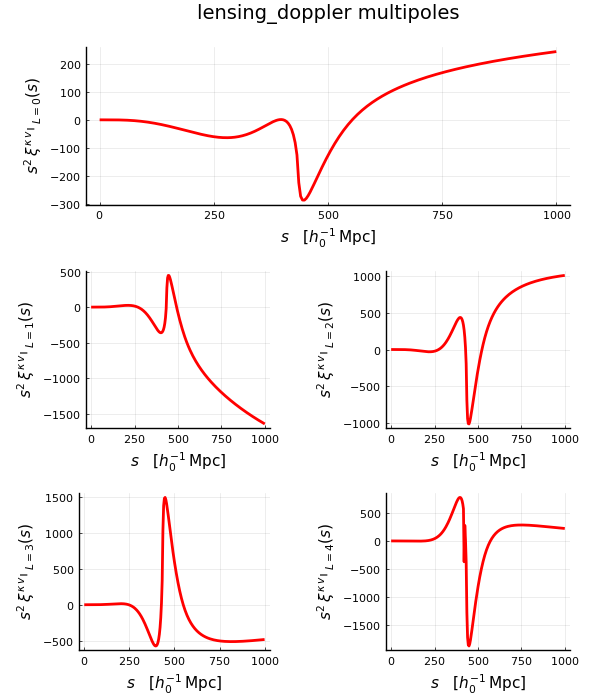

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /Users/matteofoglieni/.julia/packages/PyCall/3fwVL/src/numpy.jl:67


In [10]:
pyplot()
ps = [plot() for i in 0:LIM_MULTIPOLE]

title = plot(title = effect * " multipoles", grid=false, 
    showaxis = false, bottom_margin = -20Plots.px, ticks=false)

legend_pos_norm=[:bottomleft, :topright, :bottomleft, :bottomleft, :topleft,]

legend_pos_square=[ :bottom, :topleft, :bottomleft, :bottomleft, :bottomright, ]

for i in 1:(LIM_MULTIPOLE+1)
    my_xs = my_all_ss[i]
    my_ys = my_all_ξs[i] .* my_xs .^2
    
    L=i-1
    ps[i] = plot(
        my_xs, my_ys .* my_xs .^2,
        size=(300, 100),
        lw=2, lc="red", ls=:solid,
        #label = "My",
        #legend=legend_pos_square[i],
        legend=false,
        xlabel = L"s \quad [h_0^{-1}\,\mathrm{Mpc}]",
        ylabel = L"s^2 \, " * ξs_names[INDEX_GR_EFFECT[effect]] * L"_{L=%$L}(s)",
        #xaxis=:log,
        #yaxis=:log,
        top_margins=15Plots.px,
    )
end

P = plot(title, ps..., layout=l, 
    left_margins = 15Plots.px, right_margins = 30Plots.px,
    size=(600,700))

#savefig(P, "xi_"*"$effect"*"_multipoles.pdf")
#display(P)